In [1]:
import pandas as pd
import numpy as np

wine = pd.read_csv("winemag dataset.csv")
wine.drop_duplicates(subset=None, keep='first', inplace=True)
wine.dropna(axis=0, how='any', subset=['variety'], inplace=True) 

In [2]:
print(wine.shape)
wine.head(3)

(137325, 9)


,points,title,description,taster_name,price,variety,province,country,winery
0,89,Argiolas 2017 Perdera (Monica di Sardegna),"Fragrant blue flower, Mediterranean herb and w...",Kerin O’Keefe,19.0,Red Blends,Sicily & Sardinia,Italy,Argiolas
1,89,Argiolas 2018 Costamolino (Vermentino di Sard...,Spring blossom and yellow stone fruit aromas m...,Kerin O’Keefe,19.0,Vermentino,Sicily & Sardinia,Italy,Argiolas
2,89,"Bushong 2017 Power, Corruption & Lies Red (Pas...","Deep, dark and intense aromas of blackberry me...",Matt Kettmann,43.0,Rhône-style Red Blend,California,US,Bushong


In [3]:
data = wine.groupby('variety').filter(lambda x: len(x) > 4500).reset_index(drop=True)
data['variety'].unique()     

array(['Riesling', 'Cabernet Sauvignon', 'Bordeaux-style Red Blend',
       'Chardonnay', 'Sauvignon Blanc', 'Pinot Noir', 'Red Blend'],
      dtype=object)

<AxesSubplot:title={'center':'Number of descriptions per Variety'}, xlabel='variety', ylabel='count'>

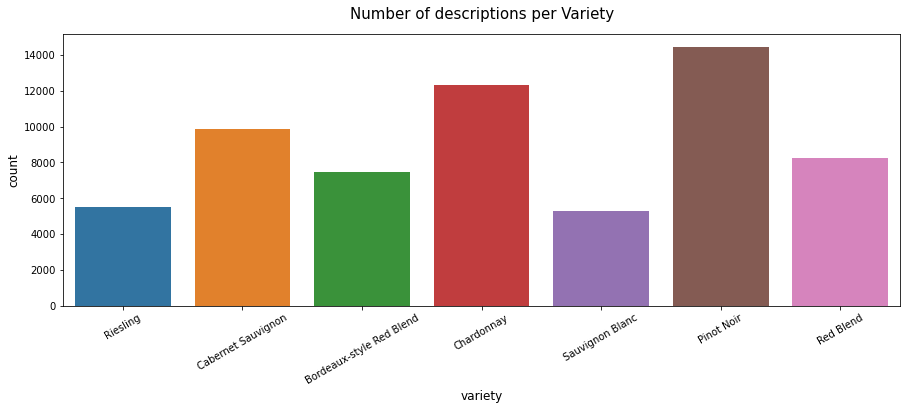

In [4]:
import matplotlib.pyplot as plt  
import seaborn as sns

plt.figure(figsize=(15,5))     
plt.title('Number of descriptions per Variety', size=15, pad=15)   
plt.xlabel('variety', fontsize=12) 
plt.xticks(rotation=30) 
plt.ylabel('count', fontsize=12) 
sns.set_color_codes("pastel")
sns.countplot(x="variety", data=data)

In [5]:
from sklearn.model_selection import train_test_split

df_X = data['description']
df_y = data['variety']
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size = 0.2, random_state=123)   

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(50506,) (12627,) (50506,) (12627,)


In [6]:
train_df = pd.DataFrame({'description': X_train, 'variety': y_train })
test_df = pd.DataFrame({'description': X_test, 'variety': y_test })
test_df.head()

,description,variety
35838,"The aromas of blue fruit, herbs and spice are ...",Cabernet Sauvignon
60035,"This SB delivers citrus peel, grass and other ...",Sauvignon Blanc
57366,"This is a quintessential café red, with a live...",Red Blend
31222,"This blend of Cabernet Sauvignon, Merlot, Syra...",Red Blend
1659,This wine is superconcentrated and complex in ...,Bordeaux-style Red Blend


In [7]:
train_df.variety.value_counts()     # Merlot is the least, 

Pinot Noir                  11627
Chardonnay                   9844
Cabernet Sauvignon           7873
Red Blend                    6579
Bordeaux-style Red Blend     5993
Riesling                     4400
Sauvignon Blanc              4190
Name: variety, dtype: int64

In [8]:
# Recreate the dataframe make the training dataset uniform, all types have the same amount.
num = train_df[train_df['variety']=='Sauvignon Blanc'].shape[0]
pn = train_df[train_df['variety']=='Pinot Noir'].sample(n=num, axis = 0)
ch = train_df[train_df['variety']=='Chardonnay'].sample(n=num, axis = 0)
ca = train_df[train_df['variety']=='Cabernet Sauvignon'].sample(n=num, axis = 0)
rb = train_df[train_df['variety']=='Red Blend'].sample(n=num, axis = 0)
bs = train_df[train_df['variety']=='Bordeaux-style Red Blend'].sample(n=num, axis = 0)
ri = train_df[train_df['variety']=='Riesling'].sample(n=num, axis = 0)
sb = train_df[train_df['variety']=='Sauvignon Blanc'].sample(n=num, axis = 0)

In [9]:
pn = pn.append(ch).append(ca).append(rb).append(bs).append(ri).append(sb)
train_df_new = pn.reset_index(drop=True)
train_df_new

,description,variety
0,The Jerome reserve is exactly what you want an...,Pinot Noir
1,Spicy forest and used coffee grind aromas ming...,Pinot Noir
2,This is a four-barrel selection from Yates Con...,Pinot Noir
3,"Lighter in color and density, this wine shows ...",Pinot Noir
4,Nelson is an underappreciated source for New Z...,Pinot Noir
...,...,...
29325,"Lightly fruity in the nose, yet sharp on the p...",Sauvignon Blanc
29326,"Ripe tropical fruits dominate this warm, soft ...",Sauvignon Blanc
29327,Grown on the famed Kimmeridgian chalk of Sance...,Sauvignon Blanc
29328,"This is a skin-contact wine, fermented on skin...",Sauvignon Blanc


In [10]:
train_df_new = train_df_new.sample(frac=1).reset_index(drop=True)     # shuffling the data
train_df_new.head()

,description,variety
0,Another fine Chardonnay from this producer. It...,Chardonnay
1,"Rich and structured, yet full and concentrated...",Bordeaux-style Red Blend
2,Aromas of sweet berry fruit and cherry lean to...,Red Blend
3,While the nose gives little away here apart fr...,Riesling
4,Rajat Parr's single-vineyard expression may be...,Chardonnay


<AxesSubplot:title={'center':'Number of descriptions per Variety'}, xlabel='variety', ylabel='count'>

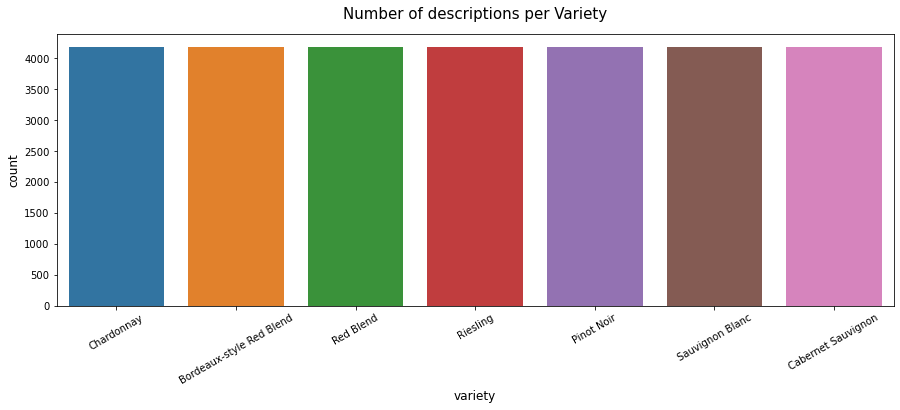

In [11]:
import matplotlib.pyplot as plt  
import seaborn as sns

plt.figure(figsize=(15,5))     
plt.title('Number of descriptions per Variety', size=15, pad=15)   
plt.xlabel('variety', fontsize=12) 
plt.xticks(rotation=30) 
plt.ylabel('count', fontsize=12) 
sns.set_color_codes("pastel")
sns.countplot(x="variety", data=train_df_new)

In [12]:
import os
bert_model_name="uncased_L-12_H-768_A-12"
bert_ckpt_dir = os.path.join(bert_model_name)
bert_ckpt_file = os.path.join(bert_ckpt_dir, "bert_model.ckpt")
bert_config_file = os.path.join(bert_ckpt_dir, "bert_config.json")

In [13]:
from bert.tokenization.bert_tokenization import FullTokenizer
from tqdm import tqdm

class IntentDetectionData:
    DATA_COLUMN = "description"
    LABEL_COLUMN = "variety"

    def __init__(self, train, test, tokenizer: FullTokenizer, classes, max_seq_len=128):
        self.tokenizer = tokenizer
        self.max_seq_len = 0
        self.classes = classes
        
        train, test = map(lambda df: df.reindex(df[IntentDetectionData.DATA_COLUMN].str.len()
                                                .sort_values().index), [train, test])

        ((self.train_x, self.train_y), (self.test_x, self.test_y)) = map(self._prepare, [train, test])

        print("max seq_len", self.max_seq_len)
        self.max_seq_len = min(self.max_seq_len, max_seq_len)
        self.train_x, self.test_x = map(self._pad, [self.train_x, self.test_x])

    def _prepare(self, df):
        x, y = [], []
        for _, row in tqdm(df.iterrows()):
            text, label = row[IntentDetectionData.DATA_COLUMN], row[IntentDetectionData.LABEL_COLUMN]
            tokens = self.tokenizer.tokenize(text)
            tokens = ["[CLS]"] + tokens + ["[SEP]"]
            token_ids = self.tokenizer.convert_tokens_to_ids(tokens)
            self.max_seq_len = max(self.max_seq_len, len(token_ids))
            x.append(token_ids)
            y.append(self.classes.index(label))
        return np.array(x), np.array(y)

    def _pad(self, ids):
        x = []
        for input_ids in ids:
            input_ids = input_ids[:min(len(input_ids), self.max_seq_len - 2)]
            input_ids = input_ids + [0] * (self.max_seq_len - len(input_ids))
            x.append(np.array(input_ids))
        return np.array(x)

In [14]:
tokenizer = FullTokenizer(vocab_file=os.path.join(bert_ckpt_dir, 'vocab.txt'))

import tensorflow.compat.v1 as tf
FLAGS = tf.app.flags.FLAGS
tokens = tokenizer.tokenize("This is Group 6.")
print(tokens)
print(tokenizer.convert_tokens_to_ids(tokens))

['this', 'is', 'group', '6', '.']
[2023, 2003, 2177, 1020, 1012]


In [15]:
classes = train_df_new.variety.unique().tolist()
data = IntentDetectionData(train_df_new, test_df, tokenizer, classes, max_seq_len=128)

29330it [00:21, 1393.30it/s]
12627it [00:08, 1476.36it/s]


max seq_len 194


In [16]:
from bert.loader import StockBertConfig, map_stock_config_to_params, load_stock_weights
from bert import BertModelLayer

import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
from tensorflow.keras import layers

def create_model(max_seq_len, bert_ckpt_file):

    with tf.io.gfile.GFile(bert_config_file, "r") as reader:
        bc = StockBertConfig.from_json_string(reader.read())
        bert_params = map_stock_config_to_params(bc)
        bert_params.adapter_size = None
        bert = BertModelLayer.from_params(bert_params, name="bert")

    input_ids = keras.layers.Input(shape=(max_seq_len, ), dtype='int32', name="input_ids")
    bert_output = bert(input_ids)

    print("bert.shape:", bert_output.shape)

    cls_out = keras.layers.Lambda(lambda seq: seq[:, 0, :])(bert_output)
    cls_out = keras.layers.Dropout(0.5)(cls_out)
    logits = keras.layers.Dense(units=768, activation="tanh")(cls_out)
    logits = keras.layers.Dropout(0.5)(logits)
    logits = keras.layers.Dense(units=len(classes), activation="softmax")(logits)

    model = keras.Model(inputs=input_ids, outputs=logits)
    model.build(input_shape=(None, max_seq_len))

    load_stock_weights(bert, bert_ckpt_file)

    return model

In [17]:
model = create_model(data.max_seq_len, bert_ckpt_file)

bert.shape: (None, 128, 768)
Done loading 196 BERT weights from: uncased_L-12_H-768_A-12/bert_model.ckpt into <bert.model.BertModelLayer object at 0x7fc1341b8d00> (prefix:bert). Count of weights not found in the checkpoint was: [0]. Count of weights with mismatched shape: [0]
Unused weights from checkpoint: 
	bert/embeddings/token_type_embeddings
	bert/pooler/dense/bias
	bert/pooler/dense/kernel
	cls/predictions/output_bias
	cls/predictions/transform/LayerNorm/beta
	cls/predictions/transform/LayerNorm/gamma
	cls/predictions/transform/dense/bias
	cls/predictions/transform/dense/kernel
	cls/seq_relationship/output_bias
	cls/seq_relationship/output_weights


In [18]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_ids (InputLayer)       [(None, 128)]             0         
_________________________________________________________________
bert (BertModelLayer)        (None, 128, 768)          108890112 
_________________________________________________________________
lambda (Lambda)              (None, 768)               0         
_________________________________________________________________
dropout (Dropout)            (None, 768)               0         
_________________________________________________________________
dense (Dense)                (None, 768)               590592    
_________________________________________________________________
dropout_1 (Dropout)          (None, 768)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 5383  

In [19]:
model.compile(      # Compiling and Training the model
  optimizer = keras.optimizers.Adam(1e-5),
  loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics = [keras.metrics.SparseCategoricalAccuracy(name="acc")])

In [20]:
import datetime

log_dir = "Bert_log/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%s")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir)

history = model.fit(
  x=data.train_x, 
  y=data.train_y,
  validation_split=0.1,
  batch_size=16,
  shuffle=True,
  epochs=5,
  callbacks=[tensorboard_callback]
)   

Epoch 1/5
1650/1650 [==============================] - 9205s 6s/step - loss: 1.5359 - acc: 0.6328 - val_loss: 1.3547 - val_acc: 0.8102
Epoch 2/5
1650/1650 [==============================] - 9348s 6s/step - loss: 1.3871 - acc: 0.8069 - val_loss: 1.2913 - val_acc: 0.8325
Epoch 3/5
1650/1650 [==============================] - 9271s 6s/step - loss: 1.3224 - acc: 0.8413 - val_loss: 1.3119 - val_acc: 0.8097
Epoch 4/5
1650/1650 [==============================] - 9198s 6s/step - loss: 1.2743 - acc: 0.8558 - val_loss: 1.2912 - val_acc: 0.8389
Epoch 5/5
1650/1650 [==============================] - 9224s 6s/step - loss: 1.2638 - acc: 0.8602 - val_loss: 1.2671 - val_acc: 0.8501


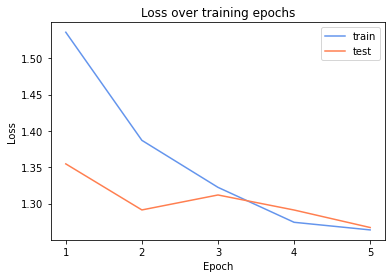

In [21]:
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax.plot(history.history['loss'], label='train', color = 'cornflowerblue')
ax.plot(history.history['val_loss'], label='test', color = 'coral')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Loss over training epochs')
plt.legend()
plt.show();

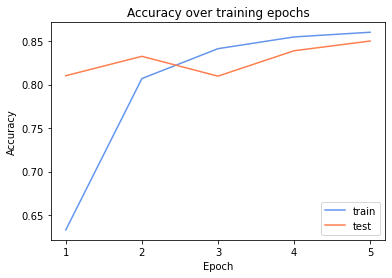

In [22]:
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax.plot(history.history['acc'], label='train', color = 'cornflowerblue')
ax.plot(history.history['val_acc'], label='test', color = 'coral')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Accuracy over training epochs')
plt.legend(loc='lower right')
plt.show();

In [23]:
_, train_acc = model.evaluate(data.train_x, data.train_y)
_, test_acc = model.evaluate(data.test_x, data.test_y)

print("train accuracy:", train_acc)
print("test accuracy:", test_acc)

419/419 [==============================] - 673s 2s/step - loss: 1.3460 - acc: 0.8382
train accuracy: 0.8877608370780945
test accuracy: 0.8382268738746643


In [24]:
y_pred = model.predict(data.test_x).argmax(axis=-1)
print('Classification report:')
print(classification_report(data.test_y, y_pred, target_names=classes))

Classification report:
                            precision   recall  f1-score   support

      Cabernet Sauvignon       0.78      0.81      0.80      1985
         Sauvignon Blanc       0.73      0.85      0.78      1098
               Red Blend       0.81      0.83      0.82      1795
                Riesling       0.86      0.92      0.89      1173
              Chardonnay       0.89      0.87      0.88      2424
              Pinot Noir       0.91      0.80      0.85      2675
Bordeaux-style Red Blend       0.82      0.82      0.82      1477


                accuracy                           0.84     12627
               macro avg       0.83      0.84      0.84     12627
            weighted avg       0.84      0.84      0.84     12627


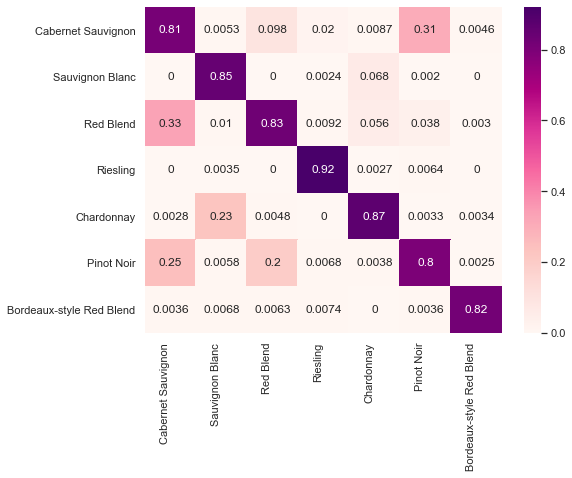

In [25]:
cm = confusion_matrix(data.test_y, y_pred)
df_cm = pd.DataFrame(cm, index=classes, columns=classes)

hmap = sns.heatmap(df_cm, annot=True, fmt="d", cmap = 'RdPu')
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=90, ha='right');

In [26]:
sentences = [
  "Strong wine made of red grapes",
  "Grapy plummy and juicy taste"
]

pred_tokens = map(tokenizer.tokenize, sentences)
pred_tokens = map(lambda tok: ["[CLS]"] + tok + ["[SEP]"], pred_tokens)
pred_token_ids = list(map(tokenizer.convert_tokens_to_ids, pred_tokens))

pred_token_ids = map(lambda tids: tids +[0]*(data.max_seq_len-len(tids)),pred_token_ids)
pred_token_ids = np.array(list(pred_token_ids))

predictions = model.predict(pred_token_ids).argmax(axis=-1)

print('-------------- Wine Predictor --------------\n')

for text, label in zip(sentences, predictions):
    print("Description:", text, "\nPredicted Variety:", classes[label])   
    print('\n--------------------------------------------\n')
print('\n--------------------------------------------')

-------------- Wine Predictor --------------

Description: Strong wine made of red grapes
Predicted Variety: Bordeaux-style Red Blend

--------------------------------------------

Description: Grapy plummy and juicy taste
Predicted Variety: Cabernet Sauvignon

--------------------------------------------
